In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Art Indices

In [83]:
# define collections to be downloaded

collections_hype = ['azuki','boredapeyachtclub','nakamigos','lilpudgys','beanzofficial','degods','meebits','clonex','proof-moonbirds','hasbinft']
collections_art = ['friendship-bracelets-by-alexis-andre','pre-process-by-casey-reas','fidenza-by-tyler-hobbs','vera-molnar-themes-and-variations','terraforms','ringers-by-dmitri-cherniak',
                   'floating-world-genesis-by-a-a-murakami','portal-by-jeff-davis','chromie-squiggle-by-snowfro',
                   'cryptopunks']


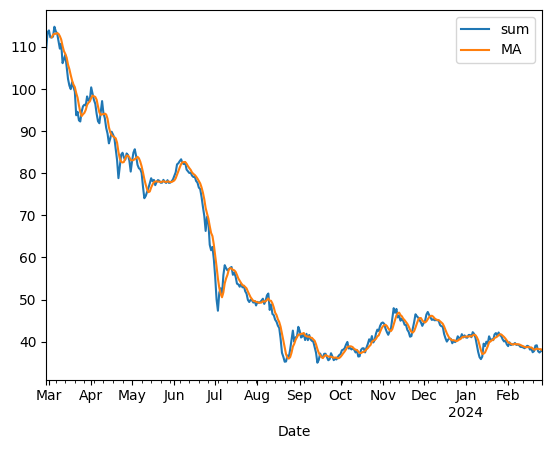

In [84]:
# hype collections
aggregated_data = pd.DataFrame()
for collection in collections_hype: 
    try:
        data = pd.read_csv(f'./raw_data/collections/{collection}.csv', index_col=0)
    except:
        print(f'Error reading {collection}.csv')
        continue
    if len(aggregated_data) == 0:
        aggregated_data = data
        # rename columns
        aggregated_data = aggregated_data.rename(columns={'Price': collection})
    else: 
        aggregated_data = aggregated_data.merge(data[['Price']], left_index=True, right_index=True, how='left')
        # rename columns
        aggregated_data = aggregated_data.rename(columns={'Price': collection})

# sum all prices
aggregated_data.index = pd.to_datetime(aggregated_data['Date'])
aggregated_data = aggregated_data.drop(columns=['Date'])
# impute missing values
aggregated_data = aggregated_data.bfill()
aggregated_data = aggregated_data.ffill()

aggregated_data['sum'] = aggregated_data.sum(axis=1)
aggregated_data['MA'] = aggregated_data['sum'].rolling(window=5).mean()
# plot
aggregated_data[['sum','MA']].plot()

aggregated_data_hype = aggregated_data[['MA']]

Error reading vera-molnar-themes-and-variations.csv


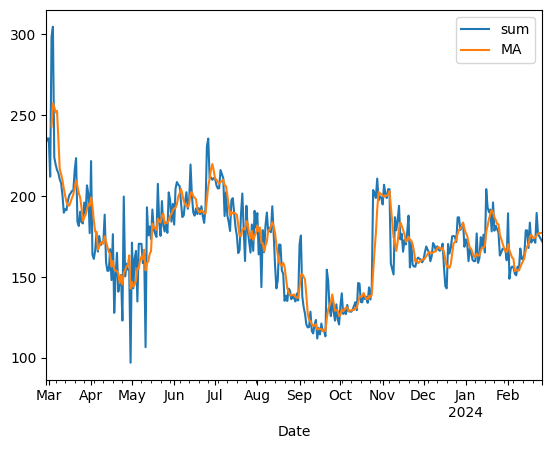

In [85]:
# hype collections
aggregated_data = pd.DataFrame()
for collection in collections_art: 
    try:
        data = pd.read_csv(f'./raw_data/collections/{collection}.csv', index_col=0)
    except:
        print(f'Error reading {collection}.csv')
        continue
    if len(aggregated_data) == 0:
        aggregated_data = data
        # rename columns
        aggregated_data = aggregated_data.rename(columns={'Price': collection})
    else: 
        aggregated_data = aggregated_data.merge(data[['Price']], left_index=True, right_index=True, how='left')
        # rename columns
        aggregated_data = aggregated_data.rename(columns={'Price': collection})

# sum all prices
aggregated_data.index = pd.to_datetime(aggregated_data['Date'])
aggregated_data = aggregated_data.drop(columns=['Date'])
# impute missing values
aggregated_data = aggregated_data.bfill()
aggregated_data = aggregated_data.ffill()

aggregated_data['sum'] = aggregated_data.sum(axis=1)
aggregated_data['MA'] = aggregated_data['sum'].rolling(window=5).mean()
# plot
aggregated_data[['sum','MA']].plot()

aggregated_data_art = aggregated_data[['MA']]

#### Join to one DF

In [86]:
all_time_series = aggregated_data_art

all_time_series = all_time_series.merge(aggregated_data_hype, left_index=True, right_index=True, how='left')

# rename columns
all_time_series = all_time_series.rename(columns={'MA_x': 'art', 'MA_y': 'hype'})

# read GF index
gf_index = pd.read_csv('./raw_data/gf_index.csv', index_col=0)
gf_index.index = pd.to_datetime(gf_index['Date'])
gf_index = gf_index.drop(columns=['Date'])
all_time_series = all_time_series.merge(gf_index, left_index=True, right_index=True, how='left')
# rename columns
all_time_series = all_time_series.rename(columns={'Value': 'gf_index'})
all_time_series['gf_index'] = all_time_series['gf_index'].ffill()
# read SPY
spy = pd.read_csv('./raw_data/spy.csv', index_col=0)
spy = spy[['4. close']]
# rename columns
spy = spy.rename(columns={'4. close': 'spy'})
spy.index = pd.to_datetime(spy.index)
all_time_series = all_time_series.merge(spy, left_index=True, right_index=True, how='left')
all_time_series['spy'] = all_time_series['spy'].ffill()
all_time_series

,art,hype,gf_index,spy
Date,,,,
2023-02-27,NaN,NaN,61.2286,397.73
2023-02-28,NaN,NaN,61.2000,396.26
2023-03-01,NaN,NaN,65.9143,394.74
2023-03-02,NaN,NaN,52.4571,397.81
2023-03-03,243.047575,112.287335,55.6857,404.19
...,...,...,...,...
2024-02-22,175.687306,38.347096,78.8571,507.50
2024-02-23,176.738166,38.219413,77.5143,507.85
2024-02-24,177.167096,38.205224,77.5143,507.85


<Axes: xlabel='Date'>

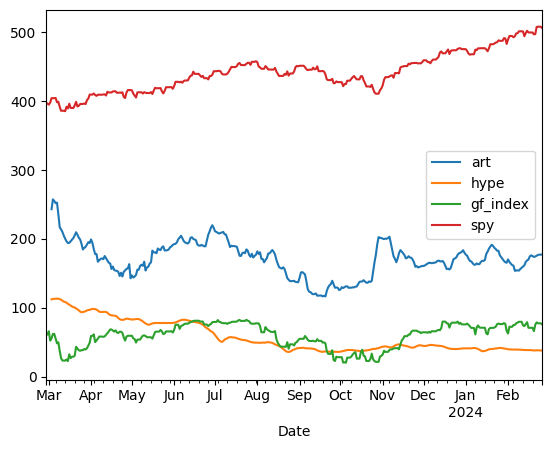

In [87]:
# plot all
all_time_series.plot()



<Axes: xlabel='Date'>

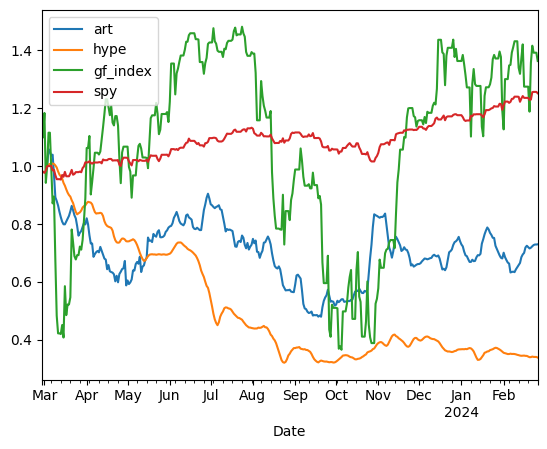

In [88]:
# normalize all time series
all_time_series_norm = all_time_series.copy()
all_time_series_norm['art'] = all_time_series_norm['art'] / all_time_series_norm['art'].loc['2023-03-03']
all_time_series_norm['hype'] = all_time_series_norm['hype'] / all_time_series_norm['hype'].loc['2023-03-03']
all_time_series_norm['gf_index'] = all_time_series_norm['gf_index'] / all_time_series_norm['gf_index'].loc['2023-03-03']
all_time_series_norm['spy'] = all_time_series_norm['spy'] / all_time_series_norm['spy'].loc['2023-03-03']
all_time_series_norm.plot()

In [89]:
# save data
all_time_series_norm.to_csv('./transformed_data/all_time_series_norm.csv') # not used in analysis
all_time_series.to_csv('./transformed_data/all_time_series.csv')

### Create Index for Positive news

In [56]:
# define collections to be downloaded

collections_cherniak = ['ringers-by-dmitri-cherniak', 'the-eternal-pump-by-dmitri-cherniak','light-years-by-dmitri-cherniak']
collections_reas = ['century-by-casey-reas', 'pre-process-by-casey-reas', 'phototaxis-by-casey-reas', '923-empty-rooms-by-casey-reas']
collections_tyler_hobbs = ['fidenza-by-tyler-hobbs','incomplete-control-by-tyler-hobbs']
collections_snowfro = ['chromie-squiggle-by-snowfro','by-snowfro','bookends-study-by-snowfro']
collections_jeff_davis = ['construction-token-by-jeff-davis','color-study-by-jeff-davis','neighborhood-by-jeff-davis','rhythm-by-jeff-davis','portal-by-jeff-davis']

collection_lists = [collections_cherniak, collections_reas, collections_tyler_hobbs, collections_snowfro, collections_jeff_davis]

In [78]:
# loop through collections and construct spread time series

all_spreads = {}
for collection_list in collection_lists:
    aggregated_data = pd.DataFrame()

    for collection in collection_list: 
        print(collection)
        try:
            data = pd.read_csv(f'./raw_data/collections/{collection}_of.csv', index_col=0)
            data.index = pd.to_datetime(data['Date'])
            data = data.drop(columns=['Date'])
            data = data.ffill()
            data = data.bfill()
        except:
            print(f'Error reading {collection}.csv')
            continue
        if len(aggregated_data) == 0:
            aggregated_data = data
            # rename columns
            aggregated_data = aggregated_data.rename(columns={'Price': collection})
        else: 
            aggregated_data = aggregated_data.merge(data[['Price']], left_index=True, right_index=True, how='left')
            # rename columns
            aggregated_data = aggregated_data.rename(columns={'Price': collection})
    aggregated_data['average'] = aggregated_data.mean(axis=1)
    # difference between average and max price on day
    aggregated_data['diff'] = aggregated_data.max(axis=1) - aggregated_data['average']
    # add naming for list convenience
    if collection_list == collections_cherniak:
        name = 'cherniak'
    elif collection_list == collections_reas:
        name = 'reas'
    elif collection_list == collections_tyler_hobbs:
        name = 'tyler_hobbs'
    elif collection_list == collections_snowfro:
        name = 'snowfro'
    elif collection_list == collections_jeff_davis:
        name = 'jeff_davis'
    else:
        name = 'unknown'


    all_spreads[name] = aggregated_data['diff']

series_dict = {k: pd.Series(v) for k, v in all_spreads.items()}

# Convert series to DataFrame
spreads_df = pd.DataFrame(series_dict)

# normalize all time series
spreads_df_norm = spreads_df.copy()
spreads_df_norm = spreads_df_norm / spreads_df_norm.loc['2023-02-27	']
# get average spread
spreads_df_norm['average'] = spreads_df_norm.mean(axis=1)
spreads_df_norm

ringers-by-dmitri-cherniak
the-eternal-pump-by-dmitri-cherniak
light-years-by-dmitri-cherniak
century-by-casey-reas
pre-process-by-casey-reas
phototaxis-by-casey-reas
923-empty-rooms-by-casey-reas
fidenza-by-tyler-hobbs
incomplete-control-by-tyler-hobbs
chromie-squiggle-by-snowfro
by-snowfro
bookends-study-by-snowfro
Error reading bookends-study-by-snowfro.csv
construction-token-by-jeff-davis
color-study-by-jeff-davis
neighborhood-by-jeff-davis
rhythm-by-jeff-davis
portal-by-jeff-davis


,cherniak,reas,tyler_hobbs,snowfro,jeff_davis,average
Date,,,,,,
2023-02-27,1.000000,1.000000,1.0,1.000000,1.00000,1.000000
2023-02-28,1.000000,1.000000,1.0,1.040542,1.00000,1.008108
2023-03-01,1.000000,1.000000,1.0,3.043113,1.00000,1.408623
2023-03-02,1.177011,1.000000,1.0,1.013344,1.00000,1.038071
2023-03-03,1.177011,1.000000,1.0,1.573706,1.00000,1.150143
...,...,...,...,...,...,...
2024-02-22,0.000000,0.080962,0.0,0.593844,0.26302,0.187565
2024-02-23,0.000000,0.080962,0.0,0.640988,0.26302,0.196994
2024-02-24,0.000000,0.079287,0.0,0.506557,0.26302,0.169773


<Axes: xlabel='Date'>

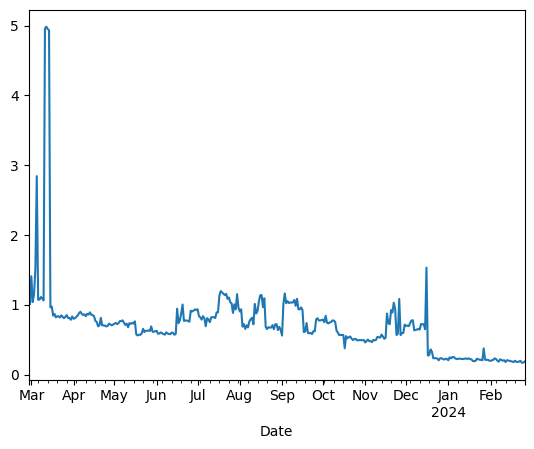

In [80]:
# plot all
spreads_df_norm['average'].plot()


In [81]:
# to csv
spreads_df_norm.to_csv('./transformed_data/spreads_df_norm.csv')